In [8]:
#hide
! [ -e /content ] && pip3 install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [9]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [11]:
#hide
!pip install -Uqq duckduckgo_search

<function fastbook.search_images_ddg(term, max_images=200)>

In [13]:
results = search_images_ddg('grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

200

In [14]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']


In [15]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

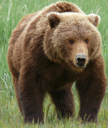

In [16]:
im = Image.open(dest)
im.to_thumb(128,128)

In [17]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [26]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear') 
        download_images(dest, urls=results)

['https://2.bp.blogspot.com/-9JAlJayP2XU/UQN3Wffpa8I/AAAAAAAAFbs/eMP5BcuLetc/s1600/Grizzly+Bear-2013-0pic-02.jpg', 'https://wallpapercave.com/wp/75Gqlwt.jpg', 'https://i1.wp.com/nypost.com/wp-content/uploads/sites/2/2020/06/grizzly-bear-yellowstone.jpg?quality=90&strip=all&ssl=1', 'https://www.alloutdoor.com/wp-content/uploads/2019/08/Grizzly_Bear_Ursus_arctos_ssp..jpg', 'https://wallpapercave.com/wp/wp4087045.jpg', 'https://www.lintelligencer.com/wp-content/uploads/2020/09/Alaska-Grizzly-kills-hunter-in-attack-at-national-park-Report.jpg', 'https://bozone.com/site/wp-content/uploads/2019/03/GRIZZLY.jpeg', 'https://grizzlybearwatching.com/wp-content/uploads/2013/02/investigating.jpg', 'http://bearlegend.com/wp-content/uploads/2012/04/2950810812_16faa4ae08_o.jpg', 'http://lifestyle.iloveindia.com/lounge/images/facts-about-grizzly-bear.jpg', 'https://purepng.com/public/uploads/large/purepng.com-grizzly-bear-standingbearheadgrizzlybrownsweetfurbrown-furgrizzly-bear-291519825702fapc0.png',

In [27]:
fns = get_image_files(path)
fns

(#568) [Path('bears/grizzly/93f0bf2e-f5fc-4d6f-b6dd-acc586c8a3fe.jpg'),Path('bears/grizzly/1a52d6d8-b043-458b-aba6-9bf38b84bdc2.jpg'),Path('bears/grizzly/91279846-b06d-46ff-b7d9-e3b9bb401eed.jpg'),Path('bears/grizzly/a1b3f2f6-bbe1-4a1d-b6f7-e7ecec33970c.jpg'),Path('bears/grizzly/265fe7db-a8df-4fed-9452-356f313ef442.jpg'),Path('bears/grizzly/59ccebfb-bcdf-446a-96d7-00c17f5c1d73.jpg'),Path('bears/grizzly/2215f57a-de98-40b2-a43b-50848a4dd0e0.jpg'),Path('bears/grizzly/d27d5b5c-4089-4df8-89da-c23356e8db09.jpg'),Path('bears/grizzly/5d516340-a645-4ff2-aef0-c346e6e8f40c.jpg'),Path('bears/grizzly/f5b3e42c-8d2b-484c-840e-303e83e7ce11.jpg')...]

In [28]:
failed = verify_images(fns)
failed

(#25) [Path('bears/grizzly/85ecdea9-8245-45c0-8815-7f5c6e4292d0.jpg'),Path('bears/grizzly/a1730d70-0d0c-473e-8102-183ad6ab5cbb.JPG'),Path('bears/grizzly/b3d6fe54-c468-43e6-afaf-72f4598e2ec0.jpg'),Path('bears/grizzly/a7a7c03b-0c68-409d-b6be-af882ed15635.jpg'),Path('bears/grizzly/9f63d187-d6eb-447d-b25e-91406e5ee8f2.jpg'),Path('bears/grizzly/87e41e5e-50b5-4985-a8e7-dfecd4094cec.jpg'),Path('bears/black/891ae48a-5984-49f3-8dac-5b12e47be1be.jpg'),Path('bears/black/32780438-e699-4c1d-a38a-1dbf06547155.jpg'),Path('bears/black/0fdf50ff-4d38-4072-ae56-f878824621ed.jpg'),Path('bears/black/c07a078f-0c85-42cc-9223-a4f23853f9ba.jpg')...]

In [29]:
failed.map(Path.unlink);

In [30]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [31]:
dls = bears.dataloaders(path)

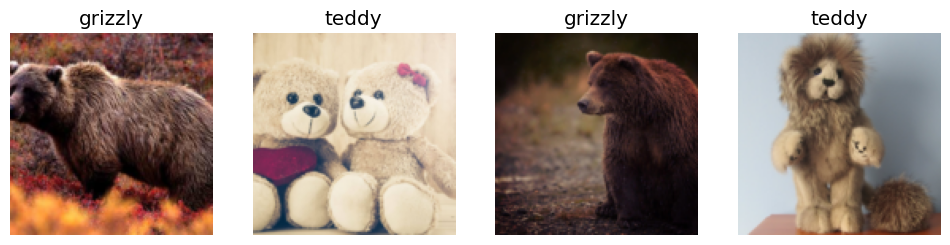

In [32]:
dls.valid.show_batch(max_n=4, nrows=1)

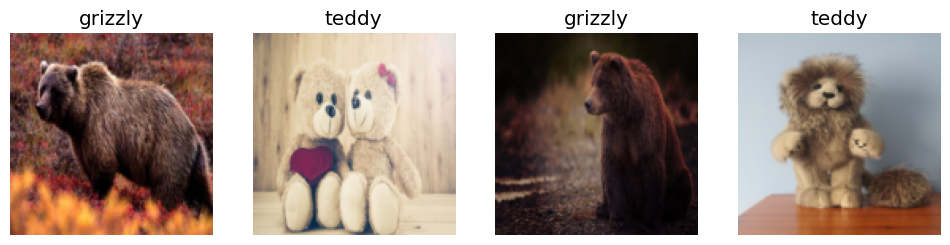

In [33]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

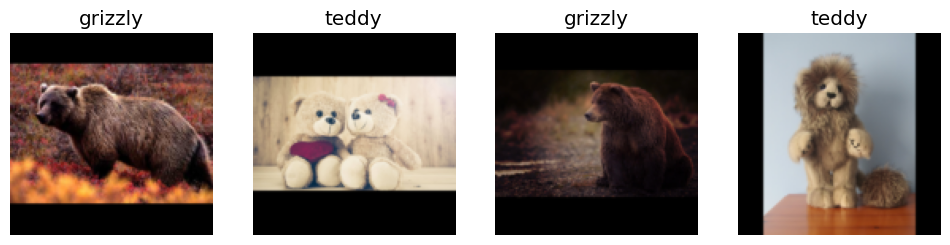

In [34]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

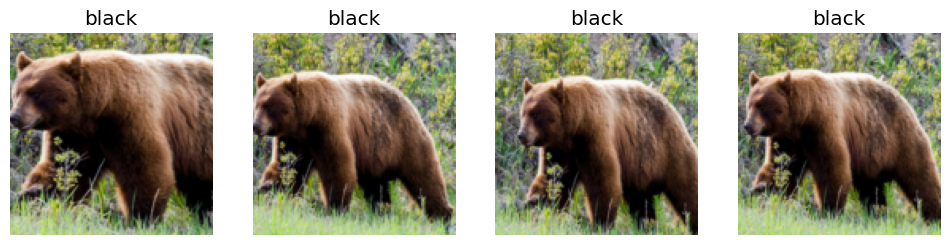

In [35]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [42]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/stephenwhelan/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:08<00:00, 5.43MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.539093,0.204679,0.055556,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.362868,0.140874,0.027778,00:17
1,0.289590,0.177048,0.064815,00:13
2,0.256918,0.182782,0.074074,00:14
3,0.228129,0.168485,0.083333,00:14


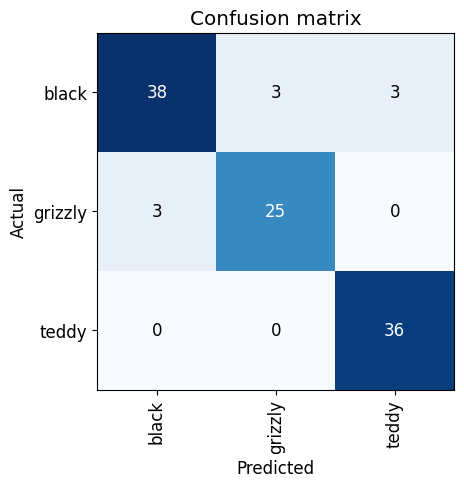

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

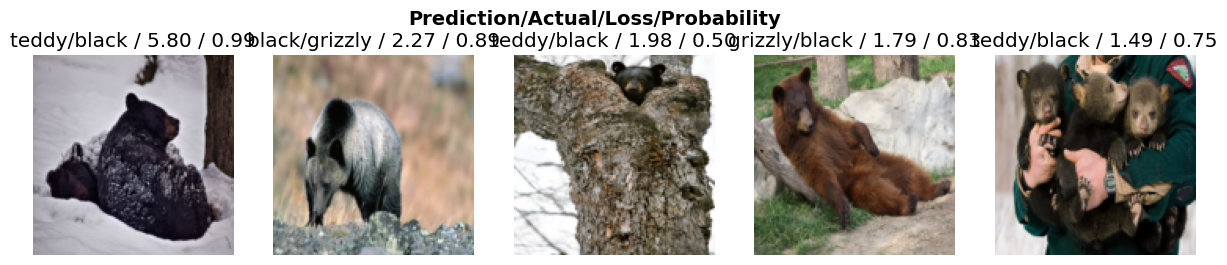

In [44]:
interp.plot_top_losses(5, nrows=1)

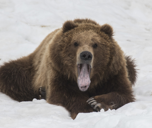

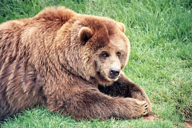

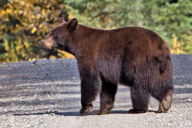

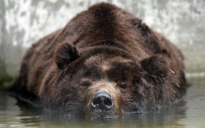

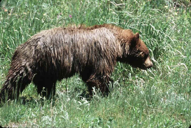

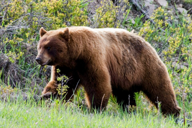

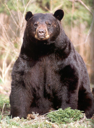

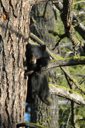

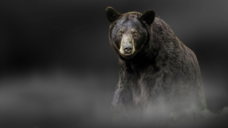

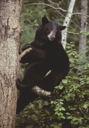

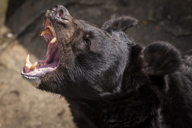

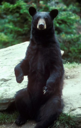

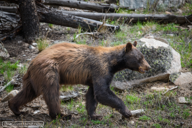

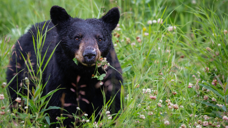

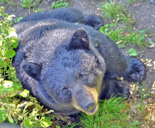

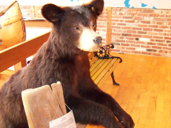

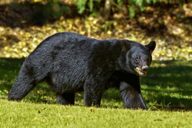

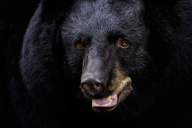

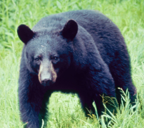

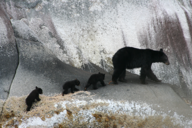

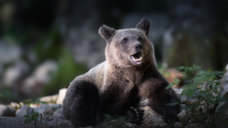

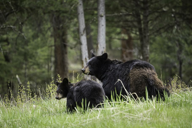

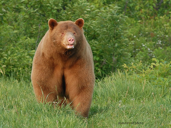

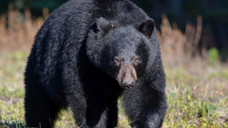

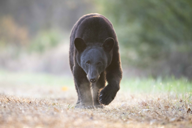

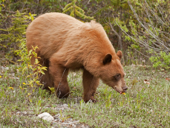

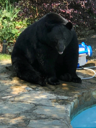

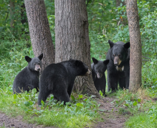

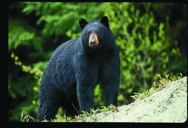

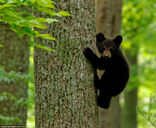

In [45]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [46]:
learn.export()

In [47]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [51]:
learn_inf = load_learner(path/'export.pkl')

In [52]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([0.0390, 0.9598, 0.0012]))

In [53]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [54]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [55]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [56]:
img = PILImage.create(btn_upload.data[-1])

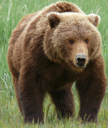

Output()

In [57]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [58]:

pred,pred_idx,probs = learn_inf.predict(img)

In [59]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9598')

In [60]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [61]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [62]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [63]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [65]:
#hide
! [ -e /content ] && pip3 install -Uqq voila